EN2550 Assignment 02

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_02

In [77]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [2]:
# q1

import numpy as np
from scipy . optimize import minimize,curve_fit
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np.hstack ( (x.reshape ( half_n , 1 ) , y.reshape( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )


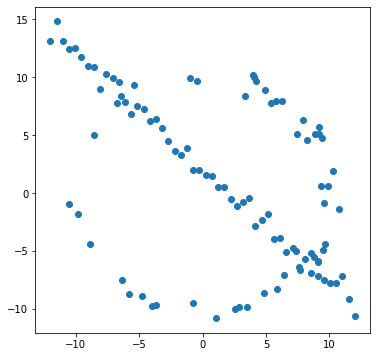

In [3]:
# just a plot to get a idea about the dataset
fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.scatter(X[:,0],X[:,1])

In [ ]:
# q1 (a)

def get_circle(points,max_r):
    # find circle from 3 points
    (x1,y1),(x2,y2),(x3,y3)=points
   
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    c = (x1-x2)**2 + (y1-y2)**2   
    h = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c)

    if(h<=np.finfo(float).eps): return None
    
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / h
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / h 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    if(r>max_r): return None

    return (px,py),r

def fit_circle(points):
    # find best circle from set of points algebraically
    x,y=points[:,0],points[:,1]
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    u = x - x_m
    v = y - y_m
    
    Suv  = np.sum(u*v)
    Suu  = np.sum(u**2)
    Svv  = np.sum(v**2)
    Suuv = np.sum(u**2 * v)
    Suvv = np.sum(u * v**2)
    Suuu = np.sum(u**3)
    Svvv = np.sum(v**3)
    
    A = np.array([ [ Suu, Suv ], [Suv, Svv]])
    B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
    uc, vc = linalg.solve(A, B)

    xc = x_m + uc
    yc = y_m + vc

    ri = np.sqrt((x-xc)**2 + (y-yc)**2)
    r  = np.mean(ri)

    return (xc,yc),r
    
def get_inliers(points,thres):
    # find inliers using RANSAC
    point_count=len(points)
    max_inlier_count=0
    max_r=(np.max(points)-np.min(points))/2
    for ittr in range(ittrs_limit):
        init_points=points[np.random.choice(point_count,3)]        
        circle=get_circle(init_points,max_r)
        
        if(circle):
            center,r=circle
            tmp_diff_sqr=(points-np.array(center))**2
            r_difs=np.abs(np.sqrt(tmp_diff_sqr[:,0]+tmp_diff_sqr[:,1])-r)
            
            inliers = points[r_difs<thres]            
            inlier_count=len(inliers)

            if inlier_count>max_inlier_count:
                match_circle,match_samples,match_inliers=circle,init_points,inliers            
                max_inlier_count=inlier_count
        
    return match_circle,match_samples,match_inliers

ittrs_limit=500
inlie_thres=1
(smpl_center,smpl_r),smpl_points,inliers=get_inliers(X,inlie_thres) #get inliers using RANSAC algo
ransac_center,ransac_r=fit_circle(inliers) #find best circle from inliers using algebriac method
 

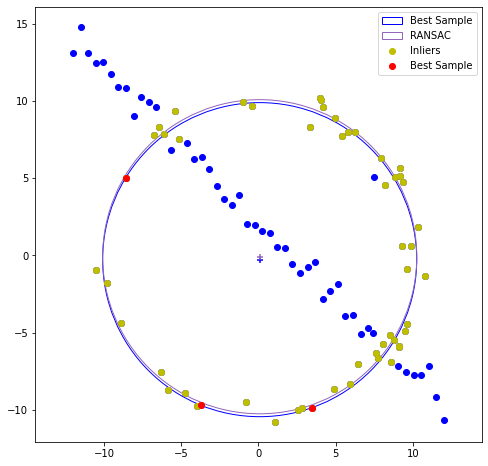

In [23]:
# q1 (b)

fig,ax=plt.subplots(1,1,figsize=(8,8))   
ax.scatter(X[:,0],X[:,1],color='b')     

smpl_circle=plt.Circle(smpl_center,smpl_r,fill=False,color='b',label="Best Sample")
ransac_circle=plt.Circle(ransac_center,ransac_r,fill=False,color='tab:purple',label="RANSAC")

ax.add_patch(smpl_circle)
ax.add_patch(ransac_circle)

ax.scatter(*smpl_center,color='b',marker='+')
ax.scatter(*ransac_center,color='tab:purple',marker='+')

ax.scatter(inliers[:,0],inliers[:,1],color='y',label="Inliers")
ax.scatter(smpl_points[:,0],smpl_points[:,1],color='r',label="Best Sample")
ax.legend(fancybox=True)

plt.axis('equal')
plt.show()

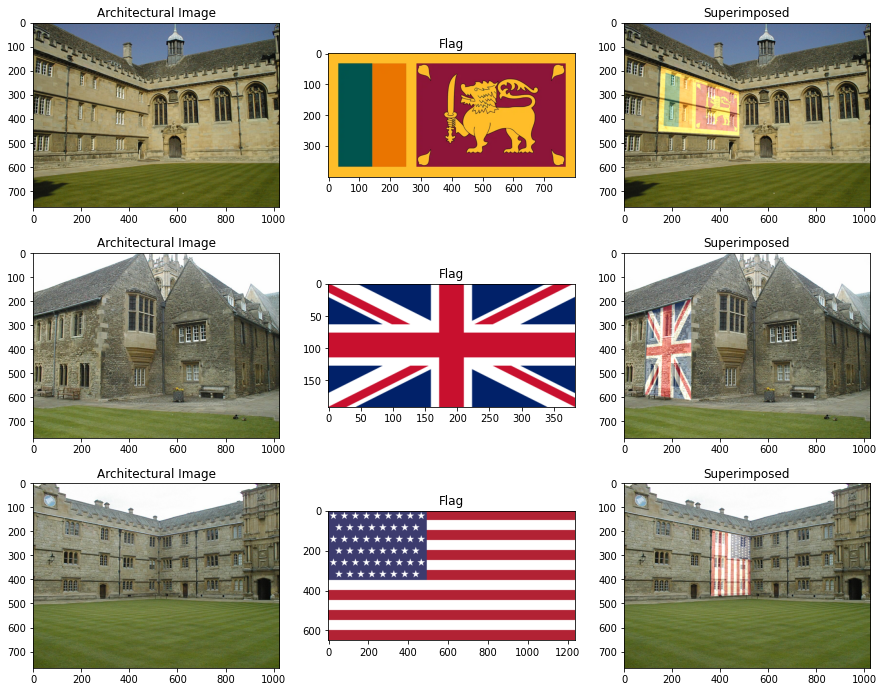

In [33]:
# q2

def mouse_click(e,x,y,f,p):   
    if e==cv.EVENT_LBUTTONDOWN:        
        g_points_des.append((x,y))

def get_points(img):
    global g_points_des
    g_points_des=[]
    cv.namedWindow('img')
    cv.setMouseCallback('img',mouse_click)
    cv.imshow('img',img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return g_points_des

def display(img_dst,img_src,img_out,i):
    cv.namedWindow('img')
    cv.imshow('img',img_out)
    key=cv.waitKey(0)
    cv.destroyAllWindows()
    imshowBGR(img_dst,ax[i,0])
    ax[i,0].set_title('Architectural Image')
    imshowBGR(img_src,ax[i,1])
    ax[i,1].set_title('Flag')
    imshowBGR(img_out,ax[i,2])
    ax[i,2].set_title('Superimposed')

fig,ax=plt.subplots(3,3,figsize=(15,12))

for i in range(1,4):

    img_dst=cv.imread('imgs2/00{}.jpg'.format(i))
    assert img_dst is not None

    img_src=cv.imread('imgs2/flag{}.png'.format(i))
    assert img_src is not None

    points_des=np.array(get_points(img_dst))   

    img_src_h=img_src.shape[0]
    img_src_w=img_src.shape[1]
    points_src=np.array([(0,0),(img_src_w,0),(img_src_w,img_src_h),(0,img_src_h)])

    h,st=cv.findHomography(points_src,points_des)
    img_warp=cv.warpPerspective(img_src,h,img_dst.shape[1::-1])

    img_out=cv.addWeighted(img_warp,0.5,img_dst,1,0.0)
    
    display(img_dst,img_src,img_out,i-1)


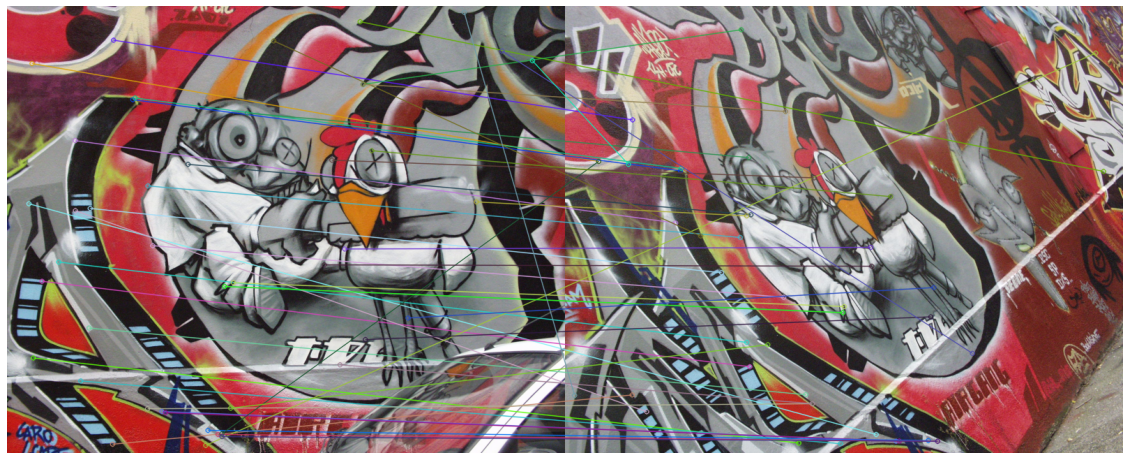

In [43]:
# q3 (a)

img1=cv.imread('imgs3/img1.ppm')
assert img1 is not None
img2=cv.imread('imgs3/img4.ppm')
assert img2 is not None

sift=cv.SIFT_create()

kp1,des1=sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)

bf=cv.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

good=[]
pts1=[]
pts2=[]
for m,n in matches:
    if m.distance<0.65*n.distance:
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)        
        good.append([m])

img_match=cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

pts1=np.array(pts1)
pts2=np.array(pts2)

fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.axis('off')
imshowBGR(img_match)

In [50]:
# q3 (b)

def compute_H(pts1,pts2):
    A=[]
    for i in range(len(pts1)):
        
        xs,ys=pts1[i]
        xd,yd=pts2[i]
        A.append((xs,ys,1,0,0,0,-xd*xs,-xd*ys,-xd))
        A.append((0,0,0,xs,ys,1,-yd*xs,-yd*ys,-yd))    

    A=np.array(A)

    L,V=np.linalg.eig(A.T @ A)
    l=np.argmin(np.abs(L))
    v=V[:,l]
    h33=v[-1]
   
    return v.reshape((3,3))/h33

max_inlier_count=0
for n in range(5000):
    smpl_indxs=np.random.choice(len(pts1),4,replace=False)

    smpl_pts1=pts1[smpl_indxs]
    smpl_pts2=pts2[smpl_indxs]

    H=compute_H(smpl_pts1,smpl_pts2)    

    Xs=np.vstack((pts1.T,np.ones(pts1.shape[0],dtype=int)))
    Xd=pts2.T    
    XdH=H @ Xs

    XdH=XdH/XdH[2]    
    XdH=np.delete(XdH,2,axis=0)    
    tmp_diff_sqr=(XdH-Xd)**2

    dis_diff=np.sqrt(tmp_diff_sqr[0]+tmp_diff_sqr[1])
    thres=2
    inlier_idxs=dis_diff<thres
    inliers=pts1[inlier_idxs],pts2[inlier_idxs]
    inlier_count=len(inliers[0])
    if(inlier_count>max_inlier_count):
        match_inliers=inliers
        max_inlier_count=inlier_count


H=compute_H(*match_inliers)
print(H)


[[ 6.56816848e-01  6.80640096e-01 -3.08528938e+01]
 [-1.51582999e-01  9.69920508e-01  1.49997446e+02]
 [ 4.09138545e-04 -1.06392211e-05  1.00000000e+00]]


In [47]:
with open('imgs3/H1to4p') as hfile:    
    dataset_H=np.array([[float(value) for value in line.split()] for line in hfile.read().splitlines()])

print(dataset_H)

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


In [51]:
ssd = (np.sum((H-dataset_H)**2))**0.5
print("square root of sum of squared differences =",ssd)

square root of sum of squared differences = 1.2801906990428609


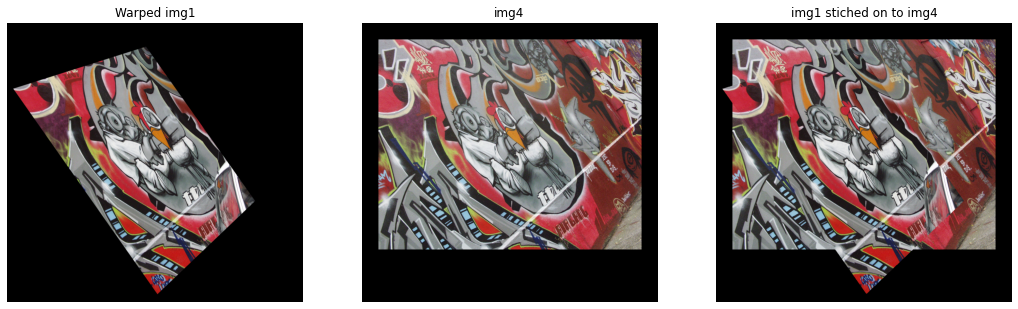

In [76]:
# q3 (c)

T=np.array([[1,0,50],[0,1,50],[0,0,1]],dtype=float)

img1_mask=np.ones(img1.shape)

canvas1=cv.warpPerspective(img1,T @ H,(900, 850))
canvas1_mask=cv.warpPerspective(img1_mask,T @ H,(900, 850))==1
canvas2=cv.warpPerspective(img2,T,(900, 850))

canvas_out=np.array(canvas2)
canvas_out[canvas1_mask]=canvas1[canvas1_mask]

fig,ax=plt.subplots(1,3,figsize=(18,14))
[axi.set_axis_off() for axi in ax.ravel()]
imshowBGR(canvas1,ax[0])
ax[0].set_title('Warped img1')
imshowBGR(canvas2,ax[1])
ax[1].set_title('img4')
imshowBGR(canvas_out,ax[2])
ax[2].set_title('img1 stiched on to img4')
plt.show()

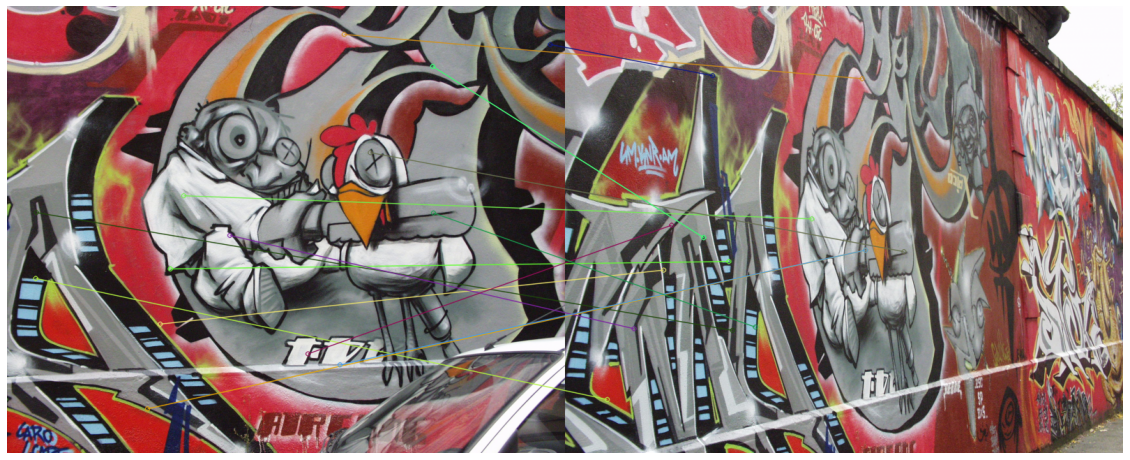

In [79]:
# for q3 trying to match SIFT features between img1 & img5 for the completion. 
# But by limiting points to best points by reducing the threshold and then manually checking 
# it can be seen that those are incorrect matches

img1=cv.imread('imgs3/img1.ppm')
assert img1 is not None
img2=cv.imread('imgs3/img5.ppm')
assert img2 is not None

sift=cv.SIFT_create()

kp1,des1=sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)

bf=cv.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

good=[]
pts1=[]
pts2=[]
for m,n in matches:
    if m.distance<0.65*n.distance:
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)        
        good.append([m])

img_match=cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

pts1=np.array(pts1)
pts2=np.array(pts2)

fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.axis('off')
imshowBGR(img_match)